In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tkinter import Tk, filedialog


In [3]:
try:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
except:
    pass

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [4]:
model = tf.keras.models.load_model("plant_disease_model.h5")
TEST_PATH = "C:\DoctorP_dataset_split/test"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    TEST_PATH, target_size=(224,224 ), batch_size=32, class_mode='categorical', shuffle=False
)

Found 6696 images belonging to 31 classes.


In [5]:

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


y_pred = model.predict(test_generator)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = test_generator.classes

cm = confusion_matrix(true_categories, predicted_categories)
print(classification_report(true_categories, predicted_categories, target_names=list(test_generator.class_indices.keys())))

210/210 [==============================] - 388s 2s/step - loss: 0.2887 - accuracy: 0.9132
Test Accuracy: 91.32%
210/210 [==============================] - 123s 576ms/step
                        precision    recall  f1-score   support

Alternaria leaf blight       0.80      0.80      0.80        54
           Anthracnose       1.00      0.95      0.97        41
        Bacterial spot       0.94      0.84      0.89       494
             Black rot       0.94      0.93      0.93       188
           Black spots       0.58      0.84      0.68        75
            Brown spot       1.00      0.91      0.95        33
          Downy mildew       0.94      0.90      0.92        89
          Early Blight       0.96      1.00      0.98       405
                  Esca       0.99      0.95      0.97       219
             Gray spot       1.00      0.92      0.96        60
          Green mottle       0.77      0.93      0.84       259
        HEALTHY PLANTS       0.94      0.94      0.94       

In [6]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (224, 224)) / 255.0
    img_expanded = np.expand_dims(img_resized, axis=0)
    
    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)
    class_names = list(test_generator.class_indices.keys())
    predicted_label = class_names[predicted_class]
    confidence = np.max(prediction) * 100
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_label} | Confidence: {confidence:.2f}%")

1/1 [==============================] - 0s 415ms/step


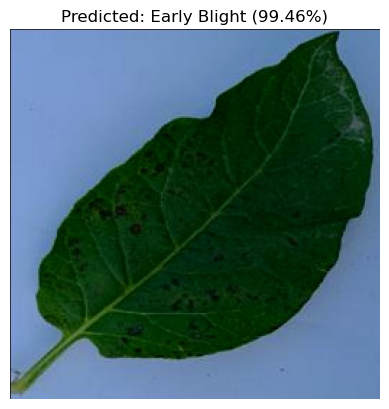

Predicted Class: Early Blight | Confidence: 99.46%


In [8]:
def choose_and_predict():
    Tk().withdraw()
    image_path = filedialog.askopenfilename()
    if image_path:
        predict_image(image_path)

def predict_random():
    import random
    random_index = random.randint(0, len(test_generator.filepaths) - 1)
    random_image_path = test_generator.filepaths[random_index]
    predict_image(random_image_path)
    
def capture_and_predict():
    cam = cv2.VideoCapture(0)
    ret, frame = cam.read()
    if ret:
        cam.release()
        cv2.destroyAllWindows()
        cv2.imwrite("captured_image.jpg", frame)
        predict_image("captured_image.jpg")
    else:
        print("Failed to capture image.")
  
  

# choose_and_predict() 
predict_random()  
# capture_and_predict() 
      
